In [4]:
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd

mpl.rcParams['figure.dpi'] = 300

In [5]:
df = pd.read_csv('../data/GvHD_pos_clustered.csv')

In [6]:
df

,CD4,CD8b,CD3,CD8,cluster_label
0,308,220,157,339,3
1,319,271,223,350,3
2,215,148,119,221,3
3,104,49,284,178,8
4,262,167,144,156,3
...,...,...,...,...,...
9078,121,53,51,180,2
9079,194,182,203,199,3
9080,201,183,115,227,3
9081,241,213,166,212,3


In [7]:
# Calculate the mean for each cluster
cluster_means = df.groupby('cluster_label').mean()

# Check which clusters have a mean greater than 280
clusters_greater_than_280 = cluster_means[cluster_means['CD3'] > 280]

In [8]:
selected_clusters = clusters_greater_than_280.index.to_numpy()

In [10]:
filtered_df = df[df['cluster_label'].isin(selected_clusters)]

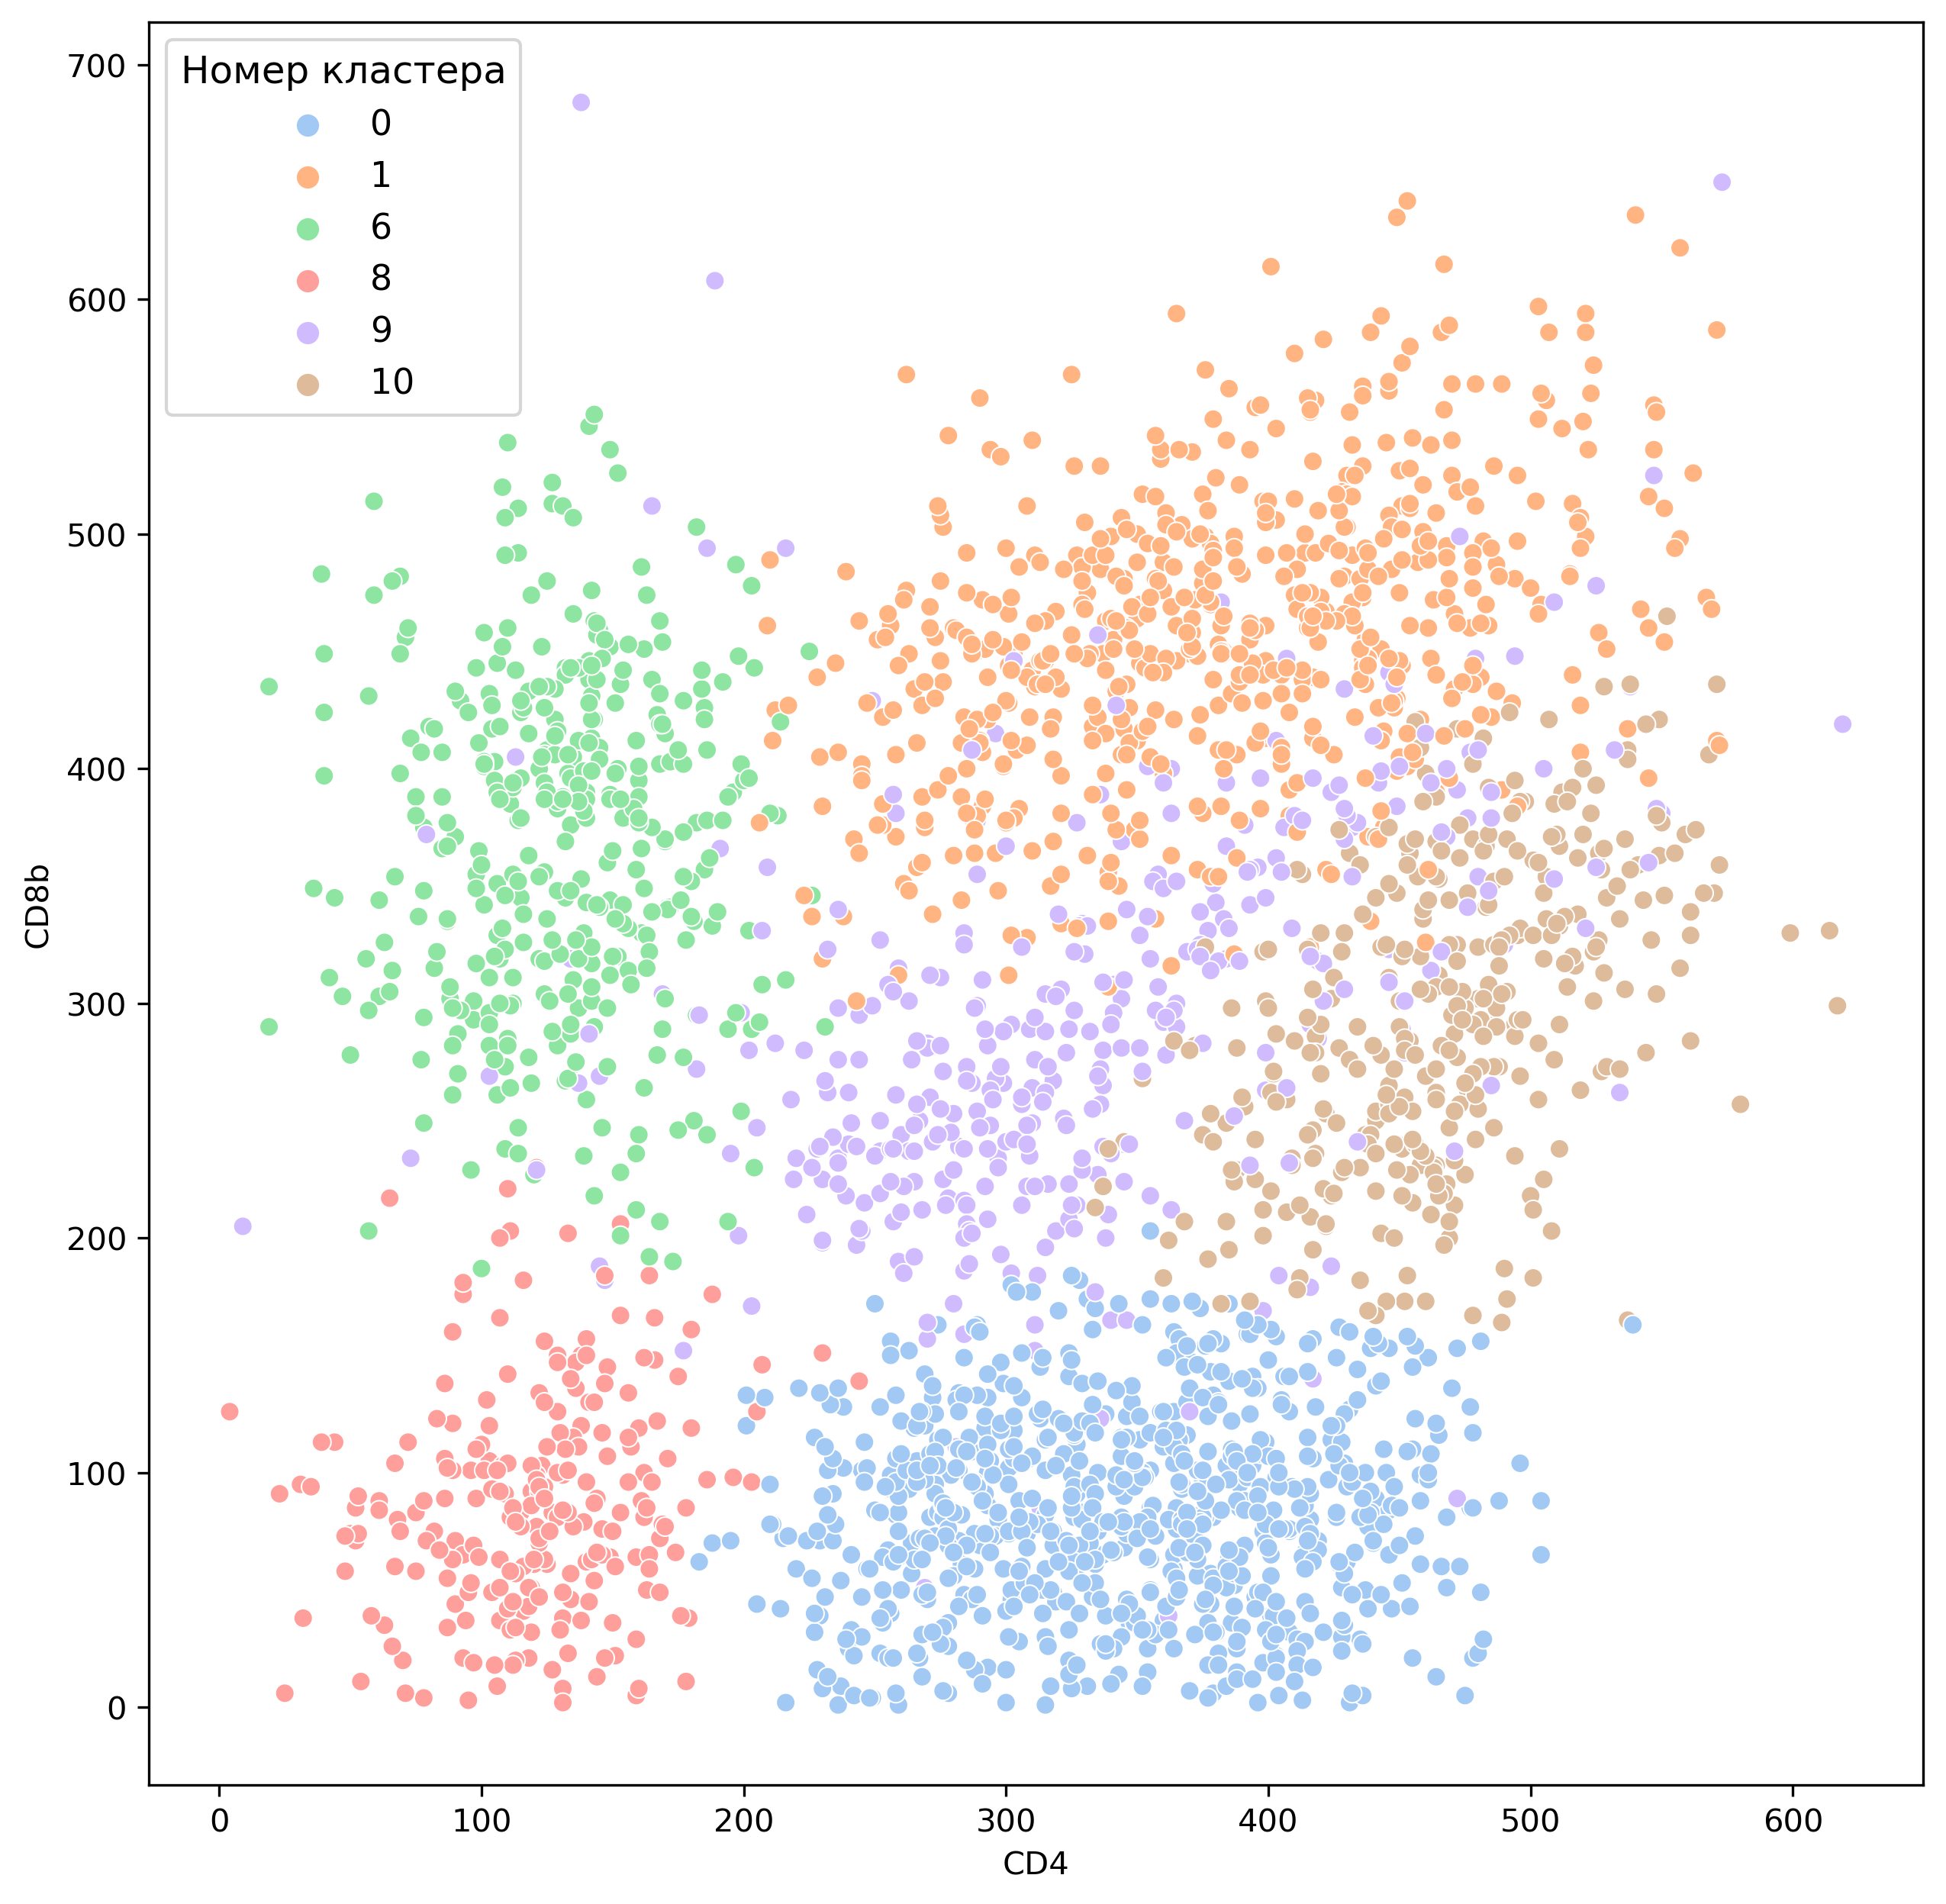

In [15]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data=filtered_df, x='CD4', y='CD8b', hue='cluster_label', palette='pastel', ax=ax)
plt.legend(title="Номер кластера", title_fontsize='12', fontsize='11')
plt.savefig('../Images/real_data.png', dpi=300)